# Minimizing Cost

### Gradient descent algorithm

* 경사를 따라 내려가며 cost를 최소로 만들어주는 W을 찾는 방법

![nn](images/gradient_descent_graph.png)

* Formal definition (W = W - cost(W)의 기울기)

![nn](images/gradient_descent.png)

### Convex function

* 시작점에 따라 도착하는 지점이 달라질 수 있음
* Convex function은 그물망같은 모양으로, 항상 같은 지점으로 도착함
* Linear regression 실행 전, Cost function이 Convex function인지 먼저 확인 필수

![nn](images/convex_function.png)

# 실습

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Convex Function 확인

In [7]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

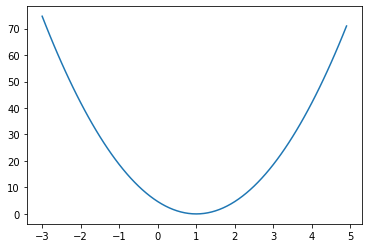

In [9]:
X = [1,2,3]
Y = [1,2,3]
W = tf.placeholder(tf.float32)
hypothesis = X * W # 간략화한 H(x)
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val=[]
cost_val=[]
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W : feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

### Gradient Descent 수동 구현

In [16]:
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

In [17]:
x_data = [1,2,3]
y_data = [1,2,3]
W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# gradient descent 수동으로 구현
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 1.8795532 [0.36536515]
1 0.53462833 [0.6615281]
2 0.15207203 [0.8194817]
3 0.043256056 [0.90372354]
4 0.012303936 [0.94865257]
5 0.0034997903 [0.9726147]
6 0.0009954894 [0.98539454]
7 0.00028316423 [0.9922104]
8 8.054388e-05 [0.99584556]
9 2.2910113e-05 [0.9977843]
10 6.517124e-06 [0.9988183]
11 1.853576e-06 [0.99936974]
12 5.2738187e-07 [0.99966383]
13 1.5001085e-07 [0.9998207]
14 4.2655568e-08 [0.9999044]
15 1.2113831e-08 [0.99994904]
16 3.4474397e-09 [0.9999728]
17 9.772675e-10 [0.9999855]
18 2.8204283e-10 [0.99999225]
19 7.9425654e-11 [0.9999959]
20 2.2961189e-11 [0.9999978]


### Gradient Descent 자동 구현

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [19]:
W = tf.Variable(5.0) # 시작점을 말도 안되는 값을 줘 봄
X = [1,2,3]
Y = [1,2,3]
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# gradient descent 자동으로 구현
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0


In [20]:
W = tf.Variable(-3.0) # 시작점을 말도 안되는 값을 줘 봄
X = [1,2,3]
Y = [1,2,3]
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# gradient descent 자동으로 구현
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0


### Optional: compute_gradient and apply_gradient

In [21]:
# Get gradients
gvs = optimizer.compute_gradients(cost)
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

In [26]:
W = tf.Variable(5.)
X = [1,2,3]
Y = [1,2,3]
hypothesis = X * W

# 수동 gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 자동 gradient
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
gvs = optimizer.compute_gradients(cost)
apply_gradients = optimizer.apply_gradients(gvs)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(appply_gradients)

TypeError: Argument `fetch` = None has invalid type "NoneType". Cannot be None